# TP 4 : Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP4_IARN/data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [ ]:
def mapping(X):

    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    x1=X[:,1]
    x2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(x1,i-j)*(np.power(x2,j));
            k=k+1
    return outX

In [ ]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));


In [ ]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
# fonction qui retourne l'expression matricielle de la fonction hypothèse de la regression linéaire
def h(X, theta):
  return np.matmul(X, theta)

# fonction qui applique la sigmoid sur la fonction hypothèse de la regression linéaire
# le résultat retourner n'est autres que la fonction hypothèse de la regression logistique
def h_sigmoid(X, theta):
  return Sigmoid(h(X, theta))

# calcule du coût
def computeCostReg(X, y, theta, param_lambda):
  m = len(y) # nombre d'exemples
  n = X.shape[1] # nombre de features
  return ((-1/m) * np.sum(y*np.log(h_sigmoid(X, theta)) + (1-y)*np.log(1-h_sigmoid(X, theta)))) + (param_lambda/(2*m))*np.sum(np.square(theta[1:n+1]))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
# gradient
def grad(X, y, theta, param_lambda):
  m = len(X)
  # grad = np.zeros((m, 1))
  # grad = np.dot((1/m), np.matmul(X.T, (h_sigmoid(X, theta) - y)))
  # grad[1:] = grad[1:] + np.dot(param_lambda/m, theta[1:])
  # return grad
  return np.dot((1/m), np.matmul(X.T, (h_sigmoid(X, theta) - y))) + np.dot(param_lambda/m, theta)

# descete du gradient
def gradientDescent(X, y, theta, alpha, iterations, param_lambda):
    cout = [] # garder le cout à chaque itération
    parametres = [] # garder la valeur de theta à chaque itération
    for i in range(iterations):
     cout.append(computeCostReg(X, y, theta, param_lambda))
     parametres.append(theta)
     theta  = theta  - np.dot(alpha, grad(X, y, theta, param_lambda))
    return theta, cout, parametres

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Calculer le cout initial

In [ ]:
# paramètre de regression
lambdaa = 1;

initialCost=computeCostReg(X2, y, theta, lambdaa)
print(initialCost)

0.6931471805599454


Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations =  62000;
alpha = 0.01;

# Appel
theta_final, cout, parametres = gradientDescent(X2, y, theta, alpha, iterations, lambdaa)
print(theta_final)

[[ 1.14190388]
 [ 0.60123144]
 [ 1.16699709]
 [-1.87160203]
 [-0.91486976]
 [-1.26861829]
 [ 0.12664503]
 [-0.36872065]
 [-0.34559473]
 [-0.17354393]
 [-1.42371283]
 [-0.04937118]
 [-0.60618373]
 [-0.26920339]
 [-1.16293373]
 [-0.2429126 ]
 [-0.20729179]
 [-0.04375837]
 [-0.28003171]
 [-0.2869324 ]
 [-0.46967028]
 [-1.03608744]
 [ 0.02863138]
 [-0.29258321]
 [ 0.01690425]
 [-0.32877656]
 [-0.13790038]
 [-0.93263938]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

Traçage du coût en à chaque itérations

Text(0, 0.5, 'coût')

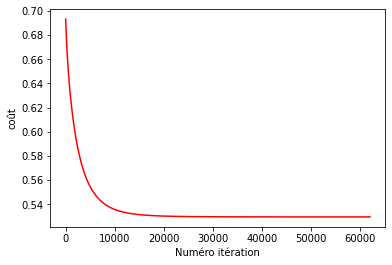

In [ ]:
plt.plot(range(62000), cout, c='r')
plt.xlabel('Numéro itération')
plt.ylabel('coût')

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawCircle(p1, p2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            value = np.multiply(np.power(p1, i-j), np.power(p2, j))
            out = np.hstack((out, value))
    return out

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [ ]:
def predict(X, theta, seuil):
  y_pred = np.zeros((len(X), 1))
  for i in range(len(X)):
   if (h_sigmoid(X[i, :], theta) >= seuil):
     y_pred[i] = 1
   else :
     y_pred[i] = 0
  return y_pred

# Affichage
Graphe representant les acceptations selon les caracteristiques

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


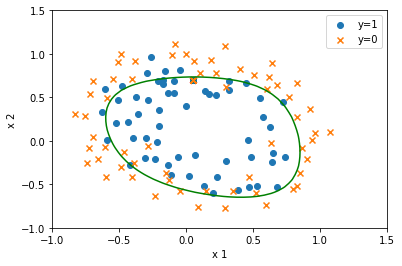

In [ ]:
plt.scatter(X2[np.where(y==1),1],X2[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X2[np.where(y==0),1],X2[np.where(y==0),2], label="y=0",marker ='x')

# appel à  la fonction drawCircle()
a = np.linspace(-1, 1.5, 50)
b = np.linspace(-1, 1.5, 50)
z = np.zeros((len(a), len(b)))
for i in range(len(a)):
  for j in range(len(b)):
    z[i,j] = np.dot(drawCircle(a[i], b[j]), theta_final)
plt.contour(a,b,z,0, colors='green', linewidth=2)
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.legend()
plt.show()

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

on voit bien que la limite de décision sépare bien nos données

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Traçage du coût en fonction de theta0 et theta1

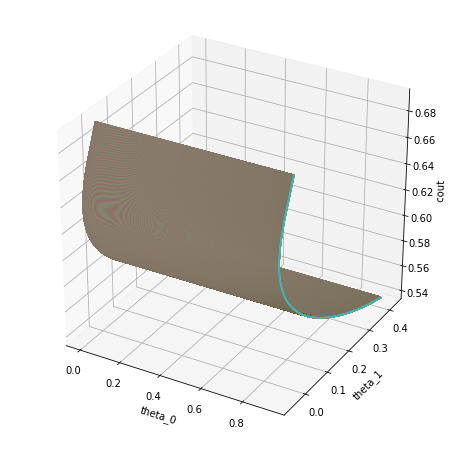

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
theta_0, theta_1 = np.meshgrid(np.array(parametres)[0:9500, 0, 0], np.array(parametres)[0:9500, 1, 0])
ax.plot3D(theta_0, theta_1, cout[0:9500])
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel(' cout')
plt.show()

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
seuil = 0.5
y_pred = predict(X2, theta, seuil)
precision = np.mean(y==y_pred)*100
print("precision : "+str(precision))

precision : 49.152542372881356


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

la moitier de nos valeurs ont été bien prédites, on peux dire que notre classifieur est moyen

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression

# création d'un objet de la classe LogisticRegression
# il faut savoir que par défaut la fonction LogisticRegression() de sklearn applique la régularisation L2
model = LogisticRegression()
# entrainement
model.fit(X[:, 1:3], y)
# prédiction
y_predict = model.predict(X[:, 1:3])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# affichage du theta finale
print(model.intercept_) # theta0
print(model.coef_) #theta1, theta2

[-0.0174072]
[[-0.26541433 -0.01162176]]
